In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(train_df, val_df, test_df, bins=20):
    """
    Function to plot histograms for features across three datasets: training, validation, and test.

    Parameters:
    - train_df: DataFrame containing the training data
    - val_df: DataFrame containing the validation data
    - test_df: DataFrame containing the test data
    - bins: Number of bins in the histogram (default is 20)
    """
    # Assuming all DataFrames have the same columns (features)
    features = train_df.columns  # Features, assuming all 3 datasets have the same columns

    # Create a figure with an appropriate number of subplots
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 3, figsize=(15, 5 * num_features))

    # Loop through features and plot histograms
    for i, feature in enumerate(features):
        # Get the corresponding data columns from the three datasets
        train_data = train_df[feature].values
        val_data = val_df[feature].values
        test_data = test_df[feature].values

        # Plot histograms with density normalization (density=True)
        axes[i, 0].hist(train_data, bins=bins, alpha=0.6, color='b', edgecolor='black', density=True)
        axes[i, 0].set_title(f'{feature} - Train (Density)')

        axes[i, 1].hist(val_data, bins=bins, alpha=0.6, color='g', edgecolor='black', density=True)
        axes[i, 1].set_title(f'{feature} - Validation (Density)')

        axes[i, 2].hist(test_data, bins=bins, alpha=0.6, color='r', edgecolor='black', density=True)
        axes[i, 2].set_title(f'{feature} - Test (Density)')

    # Automatically adjust the layout of the plots
    plt.tight_layout()
    plt.show()


In [ ]:
df=pd.read_csv('../data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [ ]:
import sys
import os

# Add the /src directory to the system path
current_dir = os.getcwd()
src_dir = os.path.abspath(os.path.join(current_dir, '../'))  # Move two levels up and enter the /src folder
sys.path.append(src_dir)

from pipelines.heart_disease_pipeline import build_pipeline


In [ ]:
# Split data into features and target (HeartDisease)
X = df.drop(columns=['HeartDisease'])  # Features
y = df['HeartDisease']  # Target variable

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Build the pipeline
pipeline = build_pipeline()

# Fit the pipeline on the training set
X_train_processed = pipeline.fit_transform(X_train, y_train)

# Transform the validation and test sets
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)


c:\Users\Aleksander Misztal\Desktop\project\perceptron-numpy-keras-torch-benchmark\env\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Aleksander Misztal\Desktop\project\perceptron-numpy-keras-torch-benchmark\env\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [15]:
X_train_processed.info(), X_train_processed.shape

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 462 to 102
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    550 non-null    int64  
 1   Sex                    550 non-null    int64  
 2   ChestPainType          550 non-null    float64
 3   RestingBP              550 non-null    float64
 4   Cholesterol            550 non-null    float64
 5   FastingBS              550 non-null    int64  
 6   RestingECG             550 non-null    float64
 7   MaxHR                  550 non-null    int64  
 8   ExerciseAngina         550 non-null    int64  
 9   Oldpeak                550 non-null    float64
 10  ST_Slope               550 non-null    float64
 11  Sex_FastingBS_Freq     550 non-null    float64
 12  Cholesterol_was_empty  550 non-null    int64  
 13  Oldpeak_was_empty      550 non-null    int64  
 14  CholesterolPerAge      550 non-null    float64
 15  HRRatio  

(None, (550, 16))

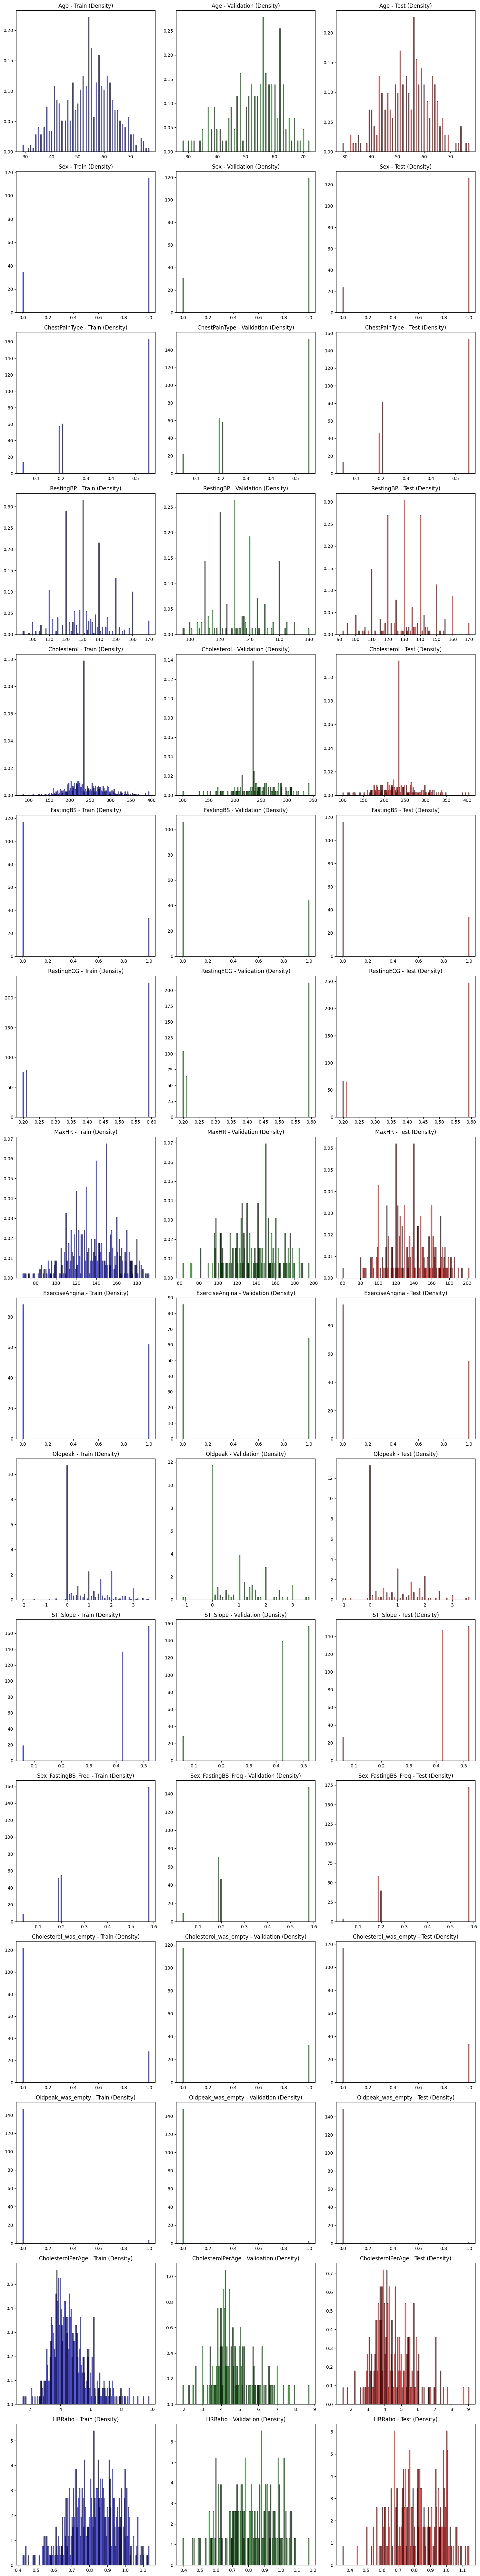

In [16]:
plot_histograms(train_df=X_train_processed, val_df=X_val_processed, test_df=X_test_processed, bins=150)